In [ ]:
# Geopandas density plots
# Time series plots
# Newborns tetanus -> health expenditure (correlated with mortality rate)
# improved sanitation, improved water source -> mortality rate

In [2]:
%%capture
!pip install geopandas
!pip install geoplot

In [3]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/gdrive')

dfn = pd.read_csv('/content/gdrive/MyDrive/AI Masters/Data Visualization/IndicatorsV2_Normalized.csv')
dfu = pd.read_csv('/content/gdrive/MyDrive/AI Masters/Data Visualization/IndicatorsV3_Unnormalized.csv')

european_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                      'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                      'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                      'United Kingdom', 'Serbia', 'Belarus', 'Moldova', 'Albania', 'Montenegro', 'Bosnia and Herzegovina', 'Kosovo', 'Montenegro', 
                      'Macedonia, FYR', 'Ukraine', 'Iceland']

eu_countries = ['Austria', 'Italy', 'Belgium', 'Latvia', 'Bulgaria', 'Lithuania', 'Croatia', 'Luxembourg', 'Cyprus', 'Malta',
                'Czech Republic', 'Netherlands', 'Denmark', 'Poland', 'Estonia', 'Portugal', 'Finland', 'Romania', 'France', 
                'Slovak Republic', 'Germany', 'Slovenia', 'Greece', 'Spain', 'Hungary', 'Sweden', 'Ireland', 'Norway', 'Switzerland', 
                'United Kingdom']

Mounted at /content/gdrive


## Geographical Heatmaps

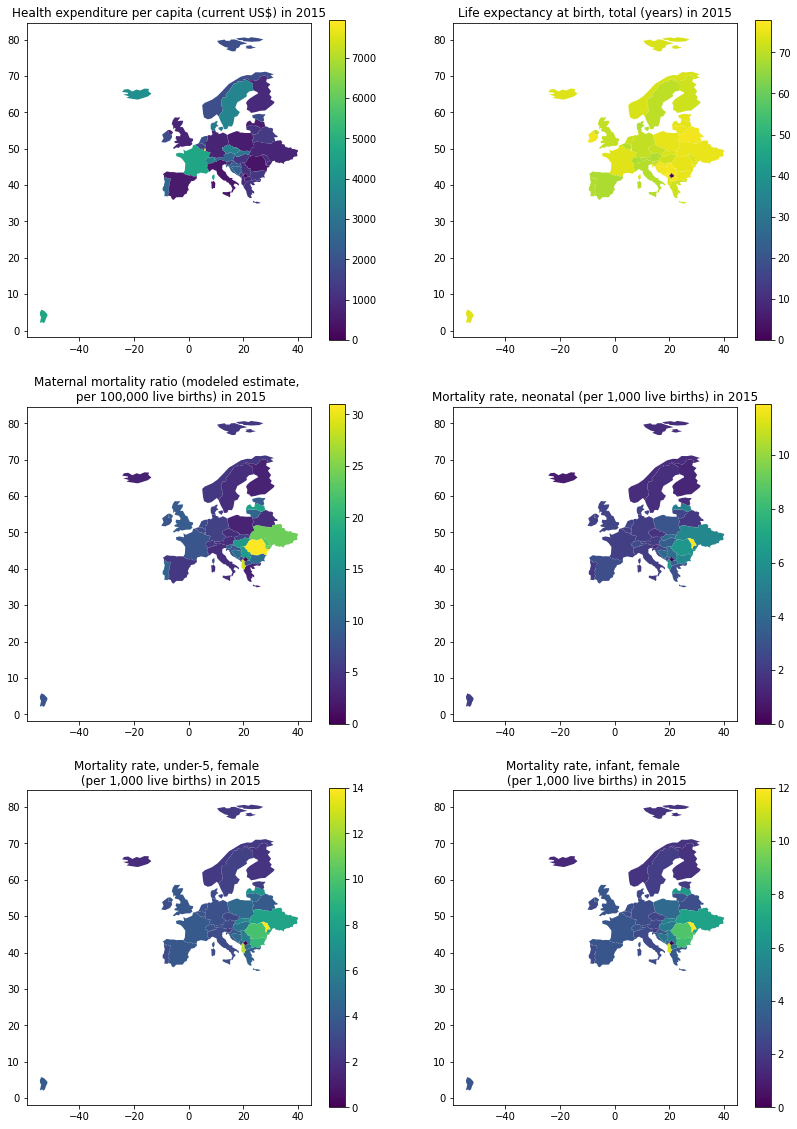

In [4]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

world = world.replace('Macedonia', 'Macedonia, FYR')
world = world.replace('Czechia', 'Czech Republic')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('Slovakia', 'Slovak Republic')

cols = ['Health expenditure per capita (current US$)', 
        'Life expectancy at birth, total (years)',
        'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
        'Mortality rate, neonatal (per 1,000 live births)', 
        'Mortality rate, under-5, female (per 1,000 live births)', 
        'Mortality rate, infant, female (per 1,000 live births)']
col_idx_map = {1: 'Health expenditure per capita (current US$)', 
               2: 'Life expectancy at birth, total (years)',
               3: 'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
               4: 'Mortality rate, neonatal (per 1,000 live births)',
               5: 'Mortality rate, under-5, female (per 1,000 live births)', 
               6: 'Mortality rate, infant, female (per 1,000 live births)'}
name_idx_map = {1: 'Health expenditure per capita (current US$)', 
                2: 'Life expectancy at birth, total (years)',
                3: 'Maternal mortality ratio (modeled estimate, \n per 100,000 live births)',
                4: 'Mortality rate, neonatal (per 1,000 live births)',
                5: 'Mortality rate, under-5, female \n (per 1,000 live births)', 
                6: 'Mortality rate, infant, female \n (per 1,000 live births)'}
df_list = []

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(3, 2)
fig.set_figwidth(14)
fig.set_figheight(20)

count=0
for r in range(3):
    for c in range(2):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1
        

plt.show()

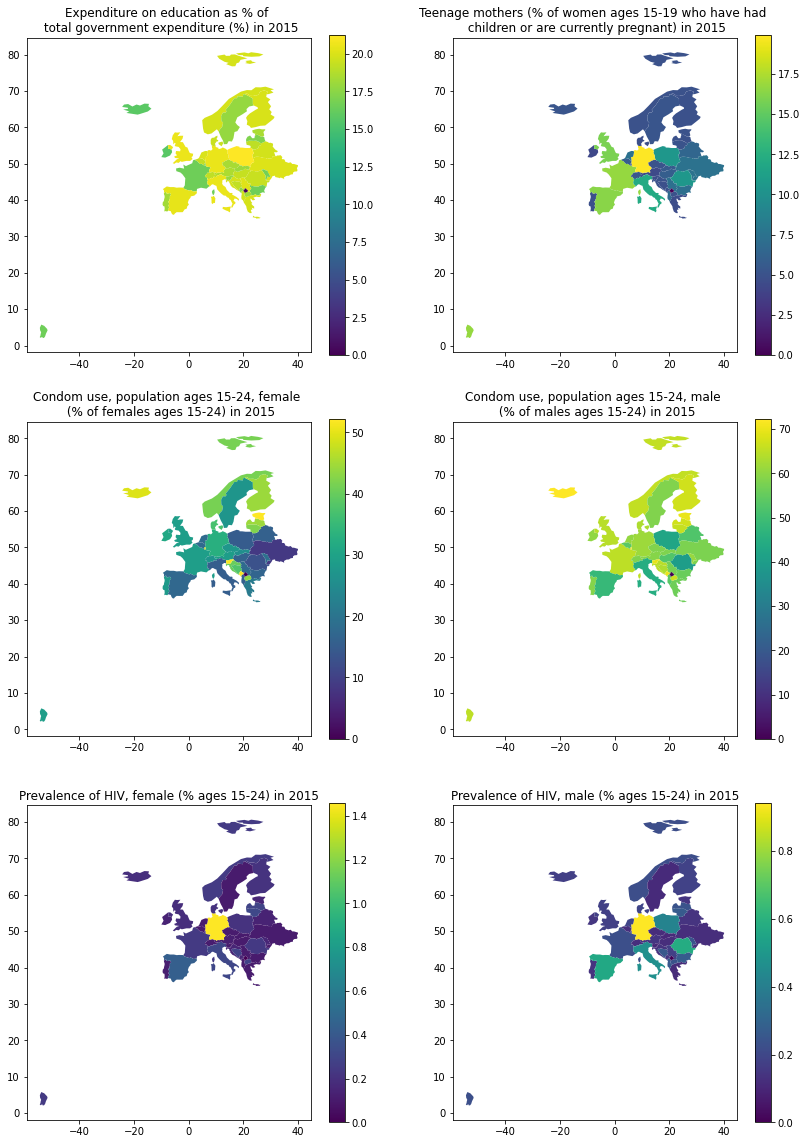

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[world.continent == 'Europe']

world.columns = ['pop_est', 'continent', 'Country', 'CODE', 'gdp_md_est', 'geometry']

world = world.replace('Macedonia', 'Macedonia, FYR')
world = world.replace('Czechia', 'Czech Republic')
world = world.replace('Bosnia and Herz.', 'Bosnia and Herzegovina')
world = world.replace('Slovakia', 'Slovak Republic')

cols = ['Expenditure on education as % of total government expenditure (%)',
        'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
        'Condom use, population ages 15-24, female (% of females ages 15-24)', 
        'Condom use, population ages 15-24, male (% of males ages 15-24)', 
        'Prevalence of HIV, female (% ages 15-24)', 
        'Prevalence of HIV, male (% ages 15-24)']
col_idx_map = {1: 'Expenditure on education as % of total government expenditure (%)', 
               2: 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)',
               3: 'Condom use, population ages 15-24, female (% of females ages 15-24)',
               4: 'Condom use, population ages 15-24, male (% of males ages 15-24)', 
               5: 'Prevalence of HIV, female (% ages 15-24)',
               6: 'Prevalence of HIV, male (% ages 15-24)'}
name_idx_map = {1: 'Expenditure on education as % of \n total government expenditure (%)',
                2: 'Teenage mothers (% of women ages 15-19 who have had \n children or are currently pregnant)', 
                3: 'Condom use, population ages 15-24, female \n (% of females ages 15-24)',
                4: 'Condom use, population ages 15-24, male \n (% of males ages 15-24)', 
                5: 'Prevalence of HIV, female (% ages 15-24)',
                6: 'Prevalence of HIV, male (% ages 15-24)'}
df_list = []

for col in cols:
    df = dfu
    df1 = df[df['Country'].isin(european_countries) * df['Year'] == 2015][['Country', col]]

    merge = pd.merge(world, df1, on='Country')
    df_list.append(merge)

fig, axes = plt.subplots(3, 2)
fig.set_figwidth(14)
fig.set_figheight(20)

count=0
for r in range(3):
    for c in range(2):
        ax = df_list[count].plot(column=col_idx_map[count+1], ax=axes[r, c], legend=True)
        ax.title.set_text(name_idx_map[count+1] + ' in 2015')
        count += 1

plt.show()

## Time Series

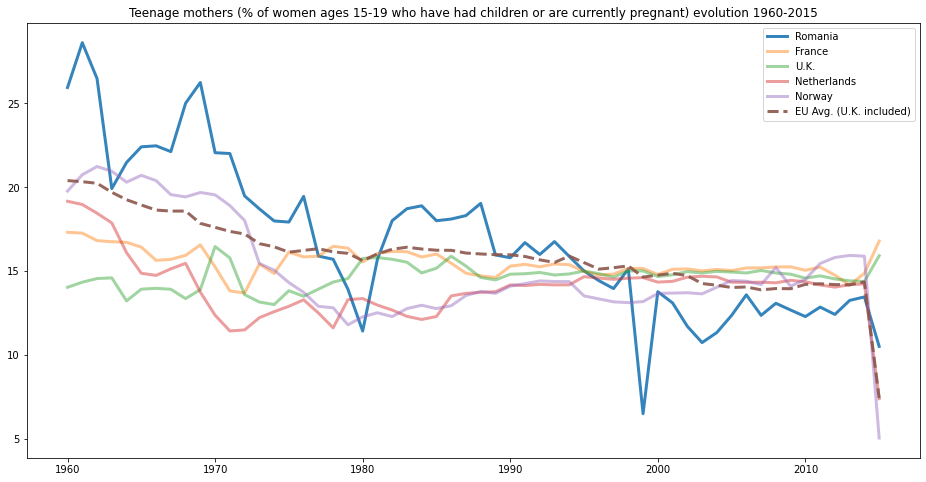

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(8)
feature = 'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)'
# Improved sanitation facilities (% of population with access)
ax.set_title(feature + ' evolution 1960-2015')

means = []
for year in range(1960, 2016):
    means.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Romania'][feature], 
        label='Romania', linewidth=3, alpha=0.9)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'France'][feature], 
        label='France', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'United Kingdom'][feature], 
        label='U.K.', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Netherlands'][feature], 
        label='Netherlands', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Norway'][feature], 
        label='Norway', linewidth=3, alpha=0.45)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        means, label='EU Avg. (U.K. included)', linewidth=3, alpha=0.9, linestyle='--')

plt.legend(loc='best')

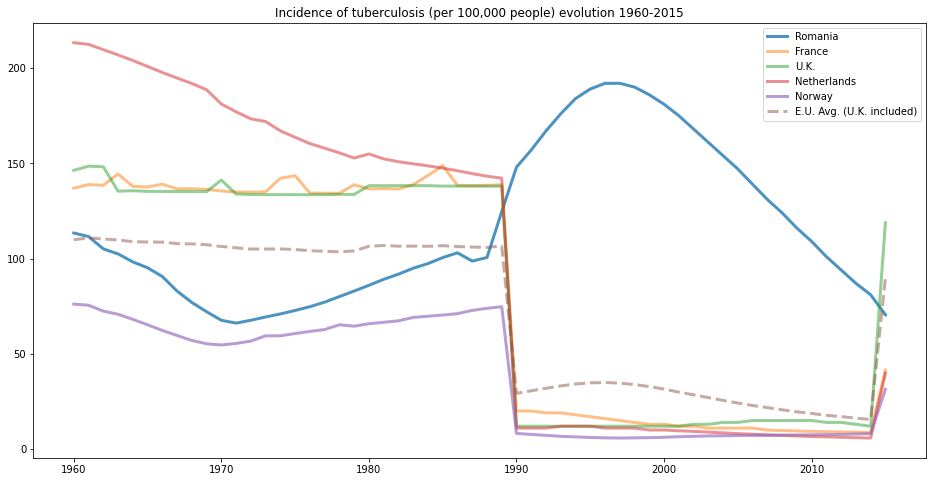

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(8)
feature = 'Incidence of tuberculosis (per 100,000 people)'
ax.set_title(feature + ' evolution 1960-2015')

means = []
for year in range(1960, 2016):
    means.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Romania'][feature], 
        label='Romania', linewidth=3, alpha=0.8)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'France'][feature], 
        label='France', linewidth=3, alpha=0.5)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'United Kingdom'][feature], 
        label='U.K.', linewidth=3, alpha=0.5)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Netherlands'][feature], 
        label='Netherlands', linewidth=3, alpha=0.5)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Norway'][feature], 
        label='Norway', linewidth=3, alpha=0.65)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        means, label='E.U. Avg. (U.K. included)', linewidth=3, alpha=0.5, linestyle='--')

plt.legend(loc='best')

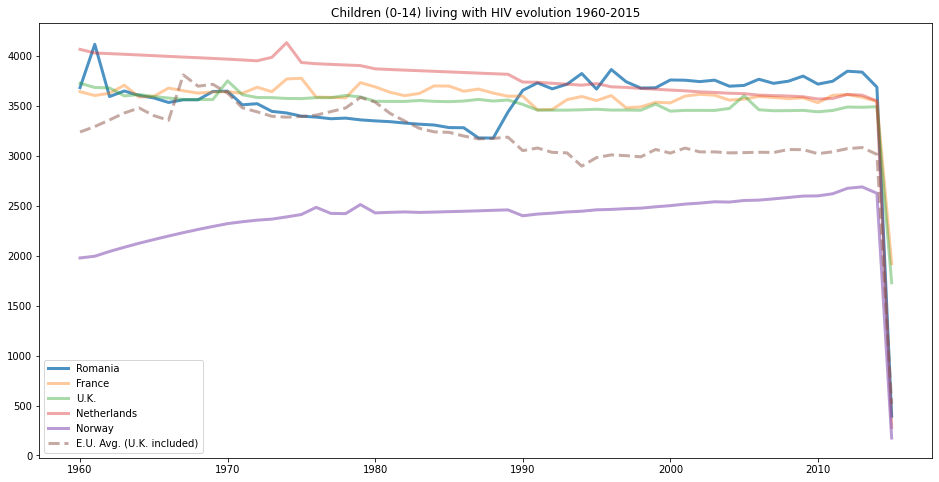

In [ ]:
fig, ax = plt.subplots()

fig.set_figwidth(16)
fig.set_figheight(8)
feature = 'Children (0-14) living with HIV'
ax.set_title(feature + ' evolution 1960-2015')

means = []
for year in range(1960, 2016):
    means.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Romania'][feature], 
        label='Romania', linewidth=3, alpha=0.8)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'France'][feature], 
        label='France', linewidth=3, alpha=0.4)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'United Kingdom'][feature], 
        label='U.K.', linewidth=3, alpha=0.4)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Netherlands'][feature], 
        label='Netherlands', linewidth=3, alpha=0.4)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        dfu[dfu['Country'] == 'Norway'][feature], 
        label='Norway', linewidth=3, alpha=0.65)
ax.plot(dfu[dfu['Country'] == 'Romania']['Year'], 
        means, label='E.U. Avg. (U.K. included)', linewidth=3, alpha=0.5, linestyle='--')

plt.legend(loc='best')

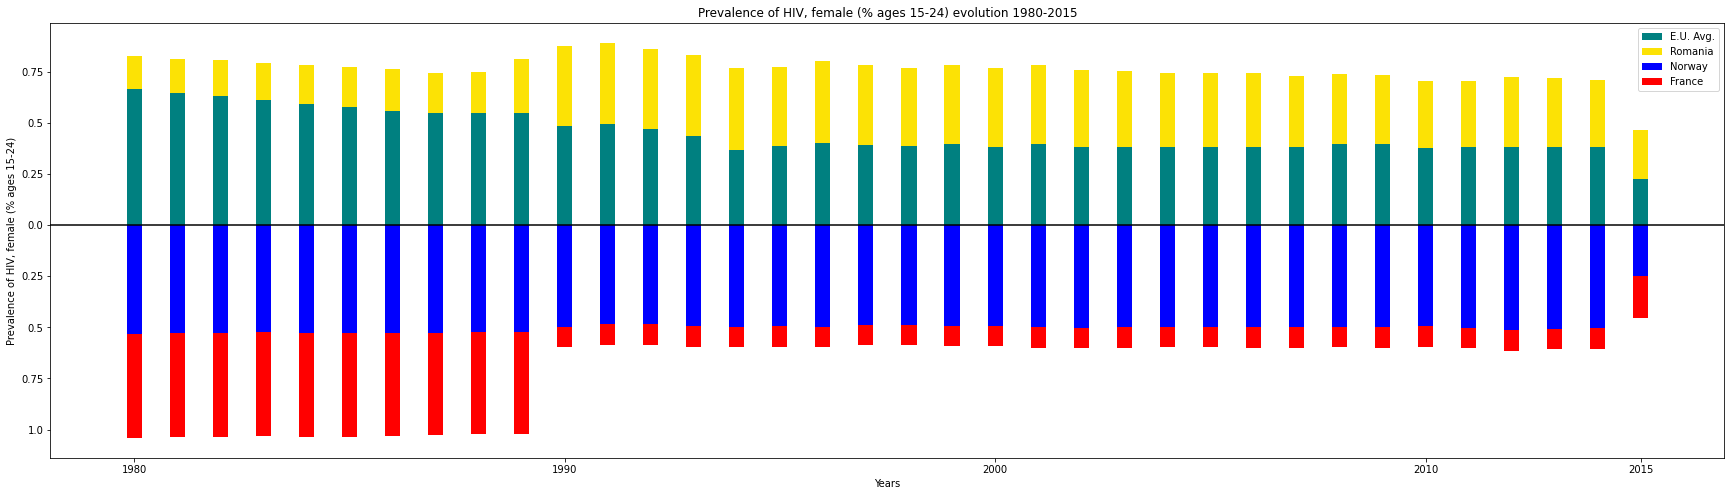

In [9]:
feature = 'Prevalence of HIV, female (% ages 15-24)'

x = list(range(1980, 2016)) 
width = 0.35 
eu_mean = []
for year in range(1980, 2016):
    eu_mean.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ro = dfu[(dfu['Country'] == 'Romania') & (dfu['Year'].isin(list(range(1980, 2016))))][feature]
dm = dfu[(dfu['Country'] == 'Denmark') & (dfu['Year'].isin(list(range(1980, 2016))))][feature] * -1
fr = dfu[(dfu['Country'] == 'France') & (dfu['Year'].isin(list(range(1980, 2016))))][feature] * -1

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(8)

ax.bar(x, eu_mean, width, label='E.U. Avg.', color='#008080')
ax.bar(x, ro, width, bottom=eu_mean, label='Romania', color='#fce205')
ax.bar(x, fr, width, label='Norway', color='b')
ax.bar(x, dm, width, bottom=fr, label='France', color='r')

ax.axhline(0, color='black')

ax.set_title('Prevalence of HIV, female (% ages 15-24) evolution 1980-2015')
ax.set_ylabel('Prevalence of HIV, female (% ages 15-24)')
ax.set_xlabel('Years')
ax.set_xticks([1980, 1990, 2000, 2010, 2015])
ax.set_yticklabels([str(abs(x)) for x in ax.get_yticks()])
ax.legend()

plt.show()

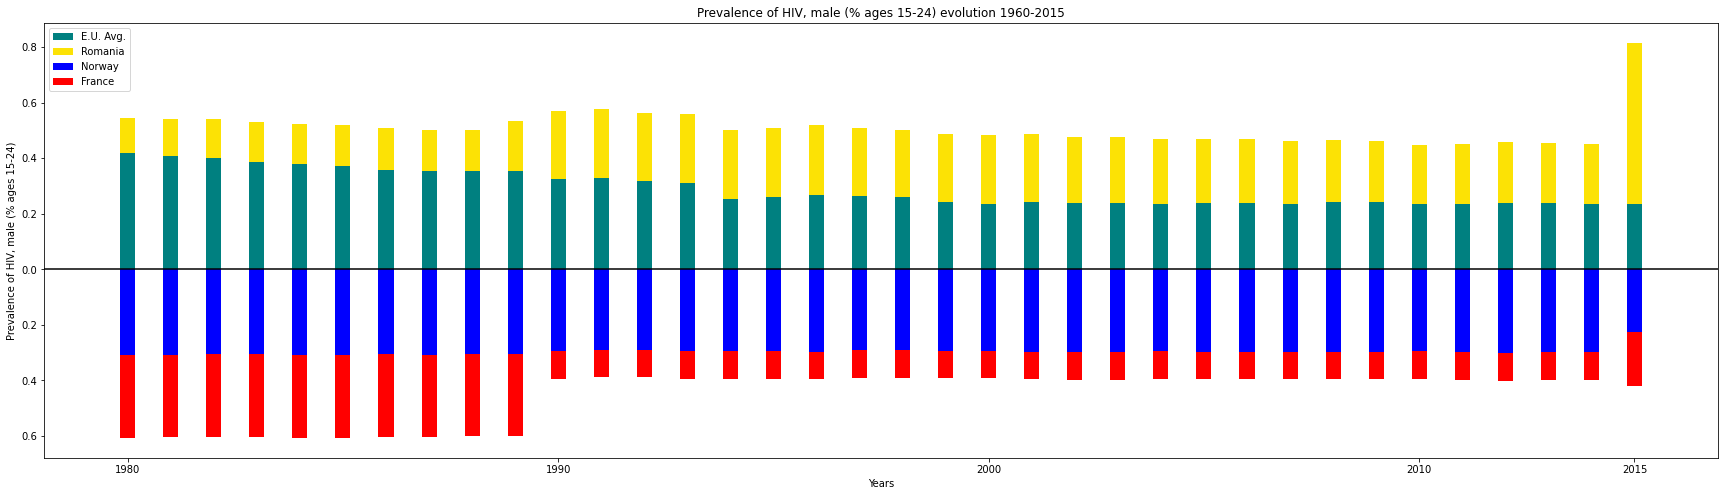

In [11]:
feature = 'Prevalence of HIV, male (% ages 15-24)'

x = list(range(1980, 2016)) 
width = 0.35 
eu_mean = []
for year in range(1980, 2016):
    eu_mean.append(dfu[dfu['Country'].isin(eu_countries) & (dfu['Year'] == year)][feature].mean())

ro = dfu[(dfu['Country'] == 'Romania') & (dfu['Year'].isin(list(range(1980, 2016))))][feature]
dm = dfu[(dfu['Country'] == 'Denmark') & (dfu['Year'].isin(list(range(1980, 2016))))][feature] * -1
fr = dfu[(dfu['Country'] == 'France') & (dfu['Year'].isin(list(range(1980, 2016))))][feature] * -1

fig, ax = plt.subplots()
fig.set_figwidth(30)
fig.set_figheight(8)

ax.bar(x, eu_mean, width, label='E.U. Avg.', color='#008080')
ax.bar(x, ro, width, bottom=eu_mean, label='Romania', color='#fce205')
ax.bar(x, fr, width, label='Norway', color='b')
ax.bar(x, dm, width, bottom=fr, label='France', color='r')

ax.axhline(0, color='black')

ax.set_title('Prevalence of HIV, male (% ages 15-24) evolution 1960-2015')
ax.set_ylabel('Prevalence of HIV, male (% ages 15-24)')
ax.set_xlabel('Years')
ax.set_xticks([1980, 1990, 2000, 2010, 2015])
ax.set_yticklabels([str(abs(round(x, 2))) for x in ax.get_yticks()])
ax.legend()

plt.show()

## Newborns tetanus -> Health Expenditure (correlated with Mortality Rate)
## Improved Sanitation, Improved Water Source -> Mortality Rate

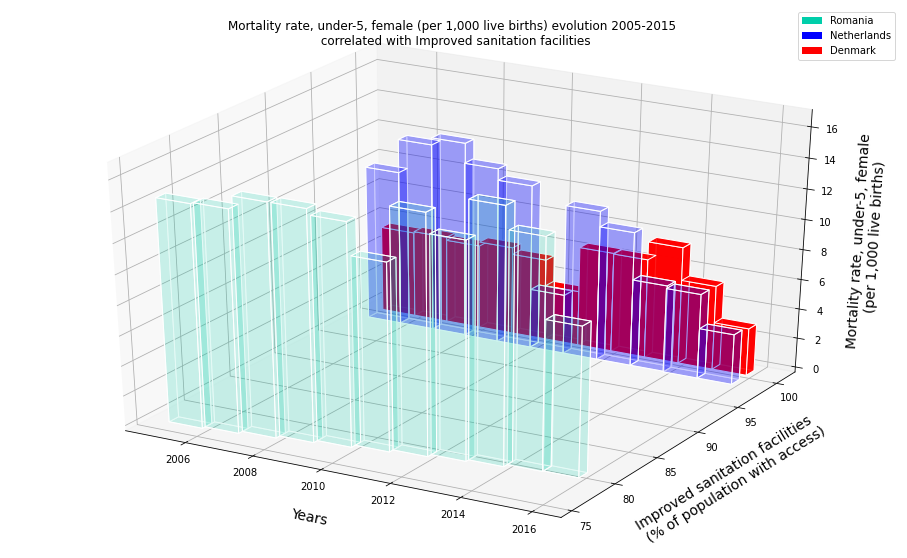

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Mortality rate, under-5, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Mortality rate, under-5, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Denmark']['Year']
ypos = dfu1[dfu1['Country'] == 'Denmark']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Denmark']['Mortality rate, under-5, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Mortality rate, under-5, female \n (per 1,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Mortality rate, under-5, female (per 1,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

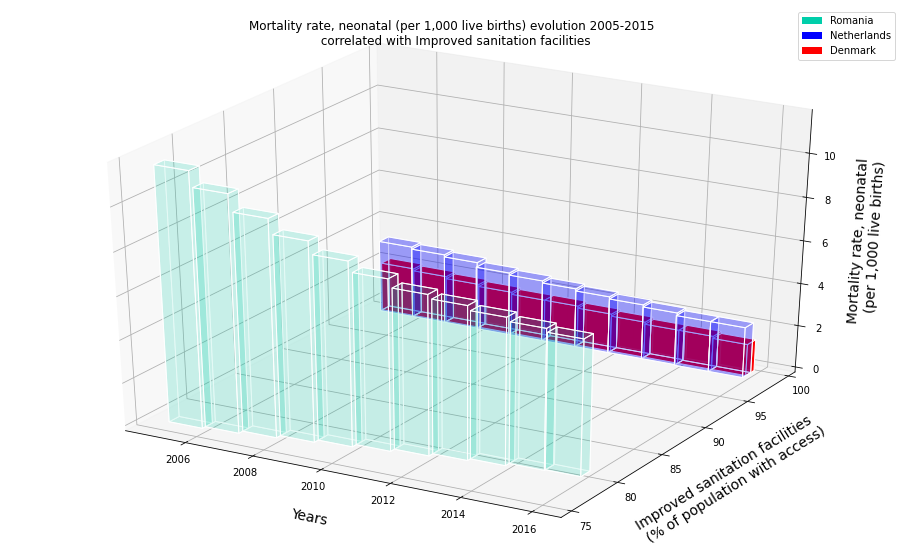

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Mortality rate, neonatal (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Mortality rate, neonatal (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Norway']['Year']
ypos = dfu1[dfu1['Country'] == 'Norway']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Norway']['Mortality rate, neonatal (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Mortality rate, neonatal \n (per 1,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Mortality rate, neonatal (per 1,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

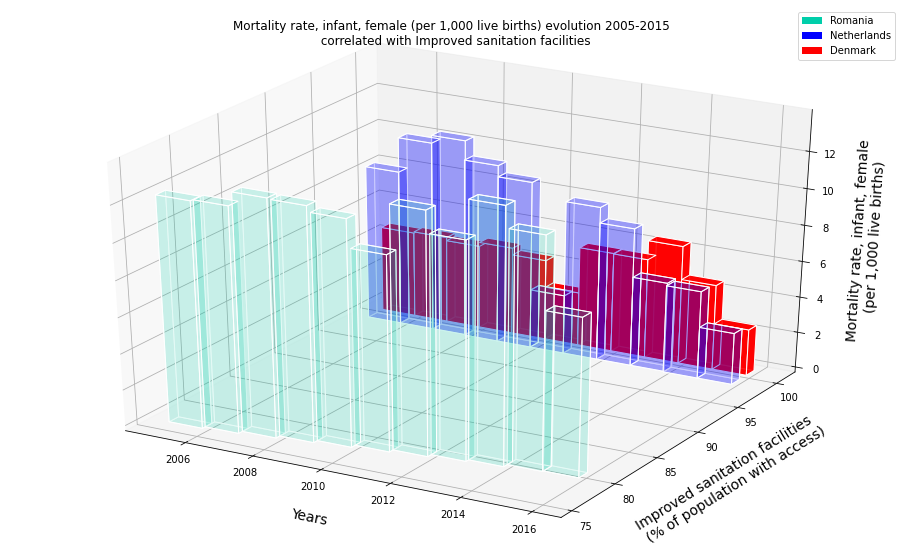

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Mortality rate, infant, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Mortality rate, infant, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Denmark']['Year']
ypos = dfu1[dfu1['Country'] == 'Denmark']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Denmark']['Mortality rate, infant, female (per 1,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Mortality rate, infant, female \n (per 1,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Mortality rate, infant, female (per 1,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

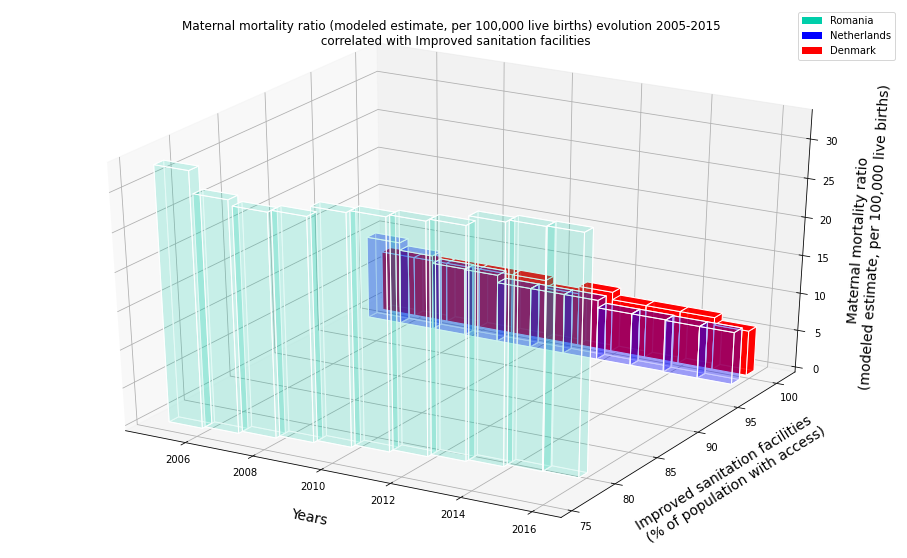

In [ ]:
from matplotlib import colors

dfu1 = dfu[dfu['Year'].isin(list(range(2005, 2016)))]

fig = plt.figure()
fig.set_figwidth(16)
fig.set_figheight(10)

ax1 = fig.add_subplot(111, projection='3d')
xpos = dfu1[dfu1['Country'] == 'Romania']['Year']
ypos = dfu1[dfu1['Country'] == 'Romania']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Romania']['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('#00ceaa'), 0.1
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='White')

xpos = dfu1[dfu1['Country'] == 'Netherlands']['Year']
ypos = dfu1[dfu1['Country'] == 'Netherlands']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Netherlands']['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('b'), 0.2
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

xpos = dfu1[dfu1['Country'] == 'Denmark']['Year']
ypos = dfu1[dfu1['Country'] == 'Denmark']['Improved sanitation facilities (% of population with access)']
num_elements = len(xpos)
zpos = np.zeros(ypos.shape[0])
dx = np.ones(xpos.shape[0])
dy = np.ones(ypos.shape[0])
dz = dfu1[dfu1['Country'] == 'Denmark']['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
rgb, alpha = colors.colorConverter.to_rgb('r'), 0.9
rgba = rgb + (alpha,)
ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, shade=False, edgecolor='white')

ro_proxy = plt.Rectangle((0, 0), 1, 1, fc="#00ceaa")
nl_proxy = plt.Rectangle((0, 0), 1, 1, fc="b")
dm_proxy = plt.Rectangle((0, 0), 1, 1, fc="r")
ax1.legend([ro_proxy, nl_proxy, dm_proxy], ['Romania', 'Netherlands', 'Denmark'])

ax1.set_xlabel('Years', fontsize=14, labelpad=20)
ax1.set_ylabel('Improved sanitation facilities \n (% of population with access)', fontsize=14, labelpad=20)
ax1.set_zlabel('Maternal mortality ratio \n (modeled estimate, per 100,000 live births)', fontsize=14, labelpad=15) 
ax1.set_title('Maternal mortality ratio (modeled estimate, per 100,000 live births) evolution 2005-2015 \n correlated with Improved sanitation facilities')

plt.show()

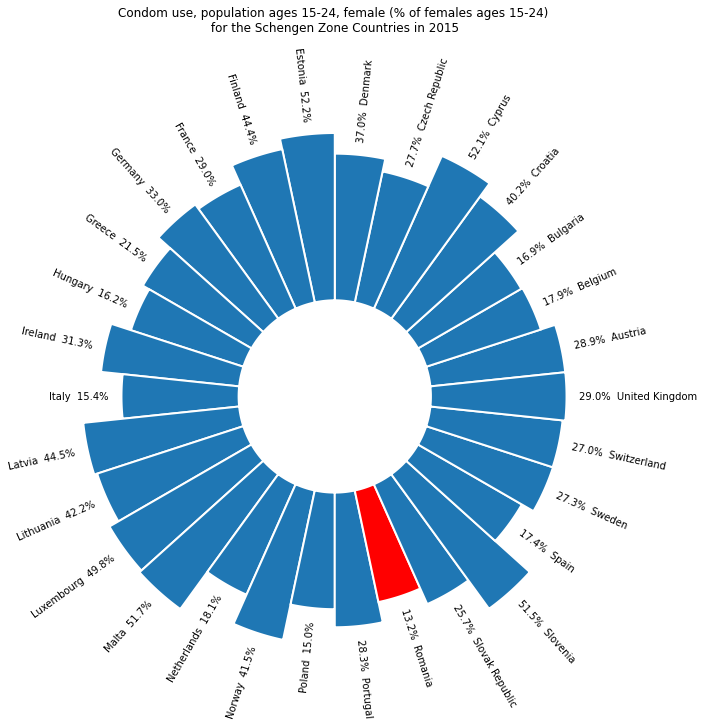

In [ ]:
df = dfu[dfu['Country'].isin(eu_countries + ['Norway', 'Switzerland']) * dfu['Year'] == 2015]
feature = 'Condom use, population ages 15-24, female (% of females ages 15-24)'
# feature = 'Condom use, population ages 15-24, male (% of males ages 15-24)'

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

ax.set_title(feature + ' \n for the Schengen Zone Countries in 2015 \n\n\n\n')

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df[feature].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df[feature] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2 * np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white", color=['#1f77b4'] * 23 + ['r'] + ['#1f77b4'] * 5)

# little space between the bar and the label
labelPadding = 4

labels_left = ['Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
               'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland']
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))
labels_right = Diff(eu_countries + ['Switzerland', 'United Kingdom'], labels_left)

# Add labels
for bar, angle, height, label, feat in zip(bars, angles, heights, df['Country'], df[feature]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    
    if label in labels_left:
        label += '  ' + str(round(feat, 1)) + '%'
    else:
        label = str(round(feat, 1)) + '%  ' + label

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

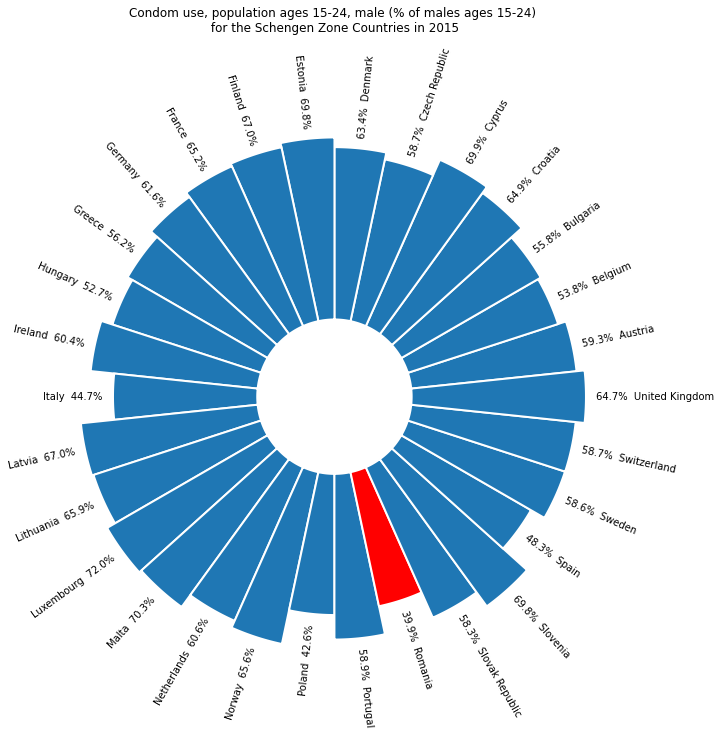

In [7]:
df = dfu[dfu['Country'].isin(eu_countries + ['Norway', 'Switzerland']) * dfu['Year'] == 2015]
feature = 'Condom use, population ages 15-24, male (% of males ages 15-24)'
# feature = 'Condom use, population ages 15-24, male (% of males ages 15-24)'

# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

ax.set_title(feature + ' \n for the Schengen Zone Countries in 2015 \n\n\n\n')

# remove grid
plt.axis('off')

# Set the coordinates limits
upperLimit = 100
lowerLimit = 30

# Compute max and min in the dataset
max = df[feature].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df[feature] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2 * np.pi / len(df.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df.index)+1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white", color=['#1f77b4'] * 23 + ['r'] + ['#1f77b4'] * 5)

# little space between the bar and the label
labelPadding = 4

labels_left = ['Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 
               'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland']
def Diff(li1, li2):
    return list(set(li1) - set(li2)) + list(set(li2) - set(li1))
labels_right = Diff(eu_countries + ['Switzerland', 'United Kingdom'], labels_left)

# Add labels
for bar, angle, height, label, feat in zip(bars, angles, heights, df['Country'], df[feature]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    
    if label in labels_left:
        label += '  ' + str(round(feat, 1)) + '%'
    else:
        label = str(round(feat, 1)) + '%  ' + label

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 